# Eigendecomposition and Singular Value Decomposition

Open in [Google Colab](https://colab.research.google.com/github/febse/ta2025/blob/main/02-05-A-SVD.ipynb)
    


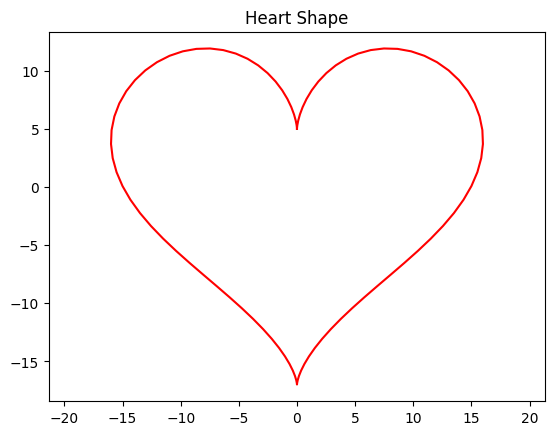

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Draw a heart in 2D using parametric equations

t = np.linspace(0, 2 * np.pi, 100)
x_heart = 16 * np.sin(t)**3
y_heart = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

plt.plot(x_heart, y_heart, color='red')
plt.title("Heart Shape")
plt.axis('equal')
plt.show()

In [3]:
from plotly import graph_objects as go

# Draw the heart shape in 3D by adding a z coordinate with some noise
# using plotly

z_heart = np.random.normal(0, 1, size=t.shape)

fig = go.Figure(data=[go.Scatter3d(
    x=x_heart,
    y=y_heart,
    z=z_heart,
    mode='markers',
    marker=dict(
        size=3,
        color='red',
    )
)])

fig.update_layout(
    title='3D Heart Shape',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=800,
    height=800
)

In [25]:
np.random.seed(42)

n = 15

x = np.random.uniform(140, 200, size=n)
y = 30 + 0.25 * x  + np.random.normal(0, 1, n)

XY = np.vstack([x, y]).T

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, 
    y=y,
    mode='markers',
    marker=dict(size=8, color='blue')
))

fig.update_layout(
    title='Simulated height/weight data',
    xaxis_title='Height (cm)',
    yaxis_title='Weight (kg)',
    width=600,
    height=500
)

fig.show()

First of all, let's recall what it does. In its heart this is a data compression technique. Let's start with a simple example that you may recall from linear algebra.

A square matrix represents a linear transformation within a vector space. For example, let's how the following matrix maps one vector to another in the plane. Note that this matrix is quite special (symmetric):

$$
A = \begin{pmatrix}
2 & -1.5 \\
-1.5 & 2
\end{pmatrix}
$$

In [5]:
import numpy as np
import plotly.graph_objects as go

# Define the matrix A
A = np.array([[2, -1.5], [-1.5, 2]])

# Define the vectors
v1 = np.array([1, 0])
v2 = np.array([-1, 3])

# Compute images under A
Av1 = A @ v1
Av2 = A @ v2

# Compute eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A)
e1 = eigenvectors[:, 0]
e2 = eigenvectors[:, 1]

# Create the plot
fig = go.Figure()

# Add eigenvector lines extending across the plot
scale = 10  # Extend lines
fig.add_trace(go.Scatter(
    x=[-scale * e1[0], scale * e1[0]],
    y=[-scale * e1[1], scale * e1[1]],
    mode='lines',
    name=f'Eigenvector 1 (λ={eigenvalues[0]:.2f})',
    line=dict(color='gray', width=1, dash='dot'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=[-scale * e2[0], scale * e2[0]],
    y=[-scale * e2[1], scale * e2[1]],
    mode='lines',
    name=fr'Eigenvector 2 (λ={eigenvalues[1]:.2f})',
    line=dict(color='darkgray', width=1, dash='dot'),
    showlegend=True
))


# Add original vectors (no labels)
fig.add_trace(go.Scatter(
    x=[0, v1[0]], y=[0, v1[1]],
    mode='lines+markers',
    name='v1',
    line=dict(color='blue', width=2),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, v2[0]], y=[0, v2[1]],
    mode='lines+markers',
    name='v2',
    line=dict(color='red', width=2),
    marker=dict(size=8)
))

# Add eigenvectors (no labels)
fig.add_trace(go.Scatter(
    x=[0, e1[0]], y=[0, e1[1]],
    mode='lines+markers',
    name='e1',
    line=dict(color='green', width=2),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, e2[0]], y=[0, e2[1]],
    mode='lines+markers',
    name='e2',
    line=dict(color='purple', width=2),
    marker=dict(size=8)
))

# Add transformed vectors (no labels)
fig.add_trace(go.Scatter(
    x=[0, Av1[0]], y=[0, Av1[1]],
    mode='lines+markers',
    name='A·v1',
    line=dict(color='lightblue', width=2, dash='dash'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, Av2[0]], y=[0, Av2[1]],
    mode='lines+markers',
    name='A·v2',
    line=dict(color='lightcoral', width=2, dash='dash'),
    marker=dict(size=8)
))

# Add transformed eigenvectors (no labels)
Ae1 = A @ e1
Ae2 = A @ e2

fig.add_trace(go.Scatter(
    x=[0, Ae1[0]], y=[0, Ae1[1]],
    mode='lines+markers',
    name='A·e1',
    line=dict(color='lightgreen', width=2, dash='dash'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, Ae2[0]], y=[0, Ae2[1]],
    mode='lines+markers',
    name='A·e2',
    line=dict(color='plum', width=2, dash='dash'),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='Vectors and their Images under Matrix A',
    xaxis_title='x',
    yaxis_title='y',
    xaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    yaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    showlegend=True,
    width=800,
    height=800
)

fig.show()

In [10]:
print("Eigenvalues:\n", eigenvalues)
print("Eivenvectors:\n", eigenvectors)

Eigenvalues:
 [3.5 0.5]
Eivenvectors:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


We can show that A (the whole transformation) can be represented using two steps

- Rotation
- Scaling 
- Rotation

$$
A = V \Lambda V^T
$$

Where V is a rotation matrix (orthogonal) and Lambda is a scaling matrix (diagonal).

In [ ]:
# Helper to format coordinates
def fmt(x, y):
    return f"({x:.2f}, {y:.2f})"

v = np.array([2, 1])
# Create the transformation steps
v_step0 = v
v_step1 = eigenvectors.T @ v  # First rotation (V^T)
v_step2 = np.diag(eigenvalues) @ v_step1  # Scaling (Lambda)
v_step3 = eigenvectors @ v_step2  # Second rotation (V)

# Helper: eigenvector lines for the plot
def eigenvector_lines(e1, e2, scale=3):
    return [
        go.Scatter(
            x=[-scale * e1[0], scale * e1[0]],
            y=[-scale * e1[1], scale * e1[1]],
            mode='lines',
            line=dict(color='gray', width=1, dash='dot'),
            showlegend=False,
            name='Eigenvector 1'
        ),
        go.Scatter(
            x=[-scale * e2[0], scale * e2[0]],
            y=[-scale * e2[1], scale * e2[1]],
            mode='lines',
            line=dict(color='darkgray', width=1, dash='dot'),
            showlegend=False,
            name='Eigenvector 2'
        )
    ]

# Create frames for animation (with labels)
frames = []

# Frame 0: Original vector
frames.append(go.Frame(
    data=[
        *eigenvector_lines(e1, e2),
        go.Scatter(x=[0, v_step0[0]], y=[0, v_step0[1]], 
                  mode='lines+markers+text', name='Vector',
                  line=dict(color='blue', width=3),
                  marker=dict(size=10),
                  text=[None, fmt(v_step0[0], v_step0[1])],
                  textposition='top right',
                  textfont=dict(color='blue'))
    ],
    name='0',
    layout=go.Layout(title_text='Step 0: Original vector v')
))

# Frame 1: After first rotation (V^T)
frames.append(go.Frame(
    data=[
        *eigenvector_lines(e1, e2),
        go.Scatter(x=[0, v_step1[0]], y=[0, v_step1[1]], 
                  mode='lines+markers+text', name='Vector',
                  line=dict(color='green', width=3),
                  marker=dict(size=10),
                  text=[None, fmt(v_step1[0], v_step1[1])],
                  textposition='top right',
                  textfont=dict(color='green'))
    ],
    name='1',
    layout=go.Layout(title_text='Step 1: After rotation by V^T')
))

# Frame 2: After scaling (Lambda)
frames.append(go.Frame(
    data=[
        *eigenvector_lines(e1, e2),
        go.Scatter(x=[0, v_step2[0]], y=[0, v_step2[1]], 
                  mode='lines+markers+text', name='Vector',
                  line=dict(color='orange', width=3),
                  marker=dict(size=10),
                  text=[None, fmt(v_step2[0], v_step2[1])],
                  textposition='top right',
                  textfont=dict(color='orange'))
    ],
    name='2',
    layout=go.Layout(title_text='Step 2: After scaling by Λ')
))

# Frame 3: After second rotation (V)
frames.append(go.Frame(
    data=[
        *eigenvector_lines(e1, e2),
        go.Scatter(x=[0, v_step3[0]], y=[0, v_step3[1]], 
                  mode='lines+markers+text', name='Vector',
                  line=dict(color='red', width=3),
                  marker=dict(size=10),
                  text=[None, fmt(v_step3[0], v_step3[1])],
                  textposition='top right',
                  textfont=dict(color='red'))
    ],
    name='3',
    layout=go.Layout(title_text='Step 3: After rotation by V (final: A·v)')
))

# Create initial figure
fig = go.Figure(
    data=[
        *eigenvector_lines(e1, e2),
        go.Scatter(x=[0, v_step0[0]], y=[0, v_step0[1]], 
                  mode='lines+markers+text', name='Vector',
                  line=dict(color='blue', width=3),
                  marker=dict(size=10),
                  text=[None, fmt(v_step0[0], v_step0[1])],
                  textposition='top right',
                  textfont=dict(color='blue'))
    ],
    layout=go.Layout(
        title='Decomposition: A = V Λ V^T',
        xaxis=dict(range=[-4, 4], zeroline=True, zerolinewidth=2),
        yaxis=dict(range=[-4, 4], zeroline=True, zerolinewidth=2),
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[
                 dict(label='Play', method='animate',
                     args=[None, dict(frame=dict(duration=2000, redraw=True), 
                                  fromcurrent=True)])
            ]
        )],
        width=600,
        height=600
    ),
    frames=frames
)

fig.show()

## Rethinking Matrix Multiplication

To see why this representation is useful, let's revisit how we can think about matrix multiplication using a single example. The way matrix multiplication is usually presented in linear
algebra classes is often the least useful one. For example, consider the multiplication of two 2x2 matrices.

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix} =
\begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d \\
\end{pmatrix}
$$


In [15]:
A_reconstructed1 = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

print("Reconstructed A (using all eigenvalues):\n", A_reconstructed1)

Reconstructed A (using all eigenvalues):
 [[ 2.  -1.5]
 [-1.5  2. ]]


### Weighted Sums of Columns

Another way to think about this multiplication is that each column of the left matrix constructs a linear combination of the columns of the right matrix.

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix} =
\begin{pmatrix}
a \begin{pmatrix} 1 \\ 3 \end{pmatrix} + c \begin{pmatrix} 2 \\ 4 \end{pmatrix} & b \begin{pmatrix} 1 \\ 3 \end{pmatrix} + d \begin{pmatrix} 2 \\ 4 \end{pmatrix}
\end{pmatrix}
= \begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d
\end{pmatrix}
$$

The latter way of thinking about the multiplication is useful when we think about regression models where the coefficients weight different features (columns) to produce predictions.

### Sum of Outer Products

For understanding the SVD we need a third way of thinking about matrix multiplication and it is as a sum of outer products of the columns of the left matrix and the rows of the right matrix.

$$
\begin{align*}
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
& = \begin{pmatrix} 1 \\ 3 \end{pmatrix} \begin{pmatrix} a & b \end{pmatrix} + \begin{pmatrix} 2 \\ 4 \end{pmatrix} \begin{pmatrix} c & d \end{pmatrix} \\
& = \begin{pmatrix}
1 a & 1 b \\
3 a & 3 b \\
\end{pmatrix} +
\begin{pmatrix}
2 c & 2 d \\
4 c & 4 d \\
\end{pmatrix} \\
& = \begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d \\
\end{pmatrix}
\end{align*}
$$

In the case of the eigendecomposition of A the sum of outer products looks like this:

$$
A = \lambda_1 v_1 v_1^T + \lambda_2 v_2 v_2^T
$$

In [ ]:
print("The matrix A:\n", A)

The matrix A:
 [[ 2.  -1.5]
 [-1.5  2. ]]


In [16]:
# The reconstructed matrix A from its eigendecomposition

A_layer_1 = np.outer(eigenvectors[:, 0], eigenvectors[:, 0])
print("A_layer_1:\n", A_layer_1)

A_layer_2 = np.outer(eigenvectors[:, 1], eigenvectors[:, 1])
print("A_layer_2:\n", A_layer_2)

A_reconstructed = eigenvalues[0] * A_layer_1 + eigenvalues[1] * A_layer_2

print("Reconstructed matrix A from its eigendecomposition:\n", A_reconstructed)

A_layer_1:
 [[ 0.5 -0.5]
 [-0.5  0.5]]
A_layer_2:
 [[0.5 0.5]
 [0.5 0.5]]
Reconstructed matrix A from its eigendecomposition:
 [[ 2.  -1.5]
 [-1.5  2. ]]


## Singular Value Decomposition (SVD)

The eigen-decomposition works only for square matrices. For rectangular matrices we can derive a similar decomposition in the form of 

$$
A = \underbrace{\begin{pmatrix} 
u_{11} & u_{12} & u_{13} & \ldots & u_{1n} \\
u_{21} & u_{22} & u_{23} & \ldots & u_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
u_{n1} & u_{n2} & u_{n3} & \ldots & u_{nn} 
\end{pmatrix}}_{n \times n}
\underbrace{\begin{pmatrix}
\sigma_1 & 0 & 0 & \ldots & 0 \\
0 & \sigma_2 & 0 & \ldots & 0 \\
0 & 0 & \sigma_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \sigma_m
\end{pmatrix}}_{n \times m}
\underbrace{\begin{pmatrix}
v_{11} & v_{12} & v_{13} & \ldots & v_{1m} \\
v_{21} & v_{22} & v_{23} & \ldots & v_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
v_{m1} & v_{m2} & v_{m3} & \ldots & v_{mm}
\end{pmatrix}}_{m \times m} = U \Sigma V^T
$$

where U and V are orthogonal matrices (rotations) and Sigma is a diagonal matrix (scaling). The values on the diagonal of Sigma are called singular values.

As a reminder, an orthogonal matrix is a square matrix whose columns and rows are orthogonal unit vectors (orthonormal vectors). The product of an orthogonal matrix and its transpose results in the identity matrix.

$$
\begin{align*}
U^T U & = I \\
V^T V & = I
\end{align*}
$$


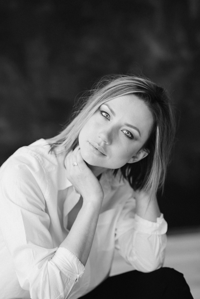

In [34]:
from PIL import Image
import requests
from io import BytesIO
# Load the image as grayscale

url = "https://raw.githubusercontent.com/febse/data/refs/heads/main/ta/example_photo.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img = img.resize((200, int(img.height * 200 / img.width)))
display(img)


In [35]:
# Convert the grayscale PIL image to a NumPy array and display as numbers
img_matrix = np.array(img)
print(img_matrix)
print("Shape:", img_matrix.shape, "Dtype:", img_matrix.dtype)

[[ 24  26  25 ...  36  34  30]
 [ 25  25  27 ...  35  32  30]
 [ 24  25  24 ...  34  31  30]
 ...
 [213 214 215 ... 157 156 155]
 [214 214 211 ... 155 155 153]
 [211 209 204 ... 152 152 152]]
Shape: (299, 200) Dtype: uint8


In [36]:
# Do a SVD on the image matrix

U, S, VT = np.linalg.svd(img_matrix, full_matrices=False)


In [37]:
(U.T @ U).round(6)  # Should be close to identity matrix

array([[ 1., -0.,  0., ..., -0.,  0.,  0.],
       [-0.,  1.,  0., ...,  0., -0., -0.],
       [ 0.,  0.,  1., ...,  0., -0.,  0.],
       ...,
       [-0.,  0.,  0., ...,  1., -0., -0.],
       [ 0., -0., -0., ..., -0.,  1., -0.],
       [ 0., -0.,  0., ..., -0., -0.,  1.]], shape=(200, 200))

In [38]:
(VT.T @ VT).round(6)  # Should be close to identity matrix

array([[ 1., -0.,  0., ...,  0., -0.,  0.],
       [-0.,  1.,  0., ..., -0.,  0., -0.],
       [ 0.,  0.,  1., ...,  0., -0.,  0.],
       ...,
       [ 0., -0.,  0., ...,  1.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  1.,  0.],
       [ 0., -0.,  0., ...,  0.,  0.,  1.]], shape=(200, 200))

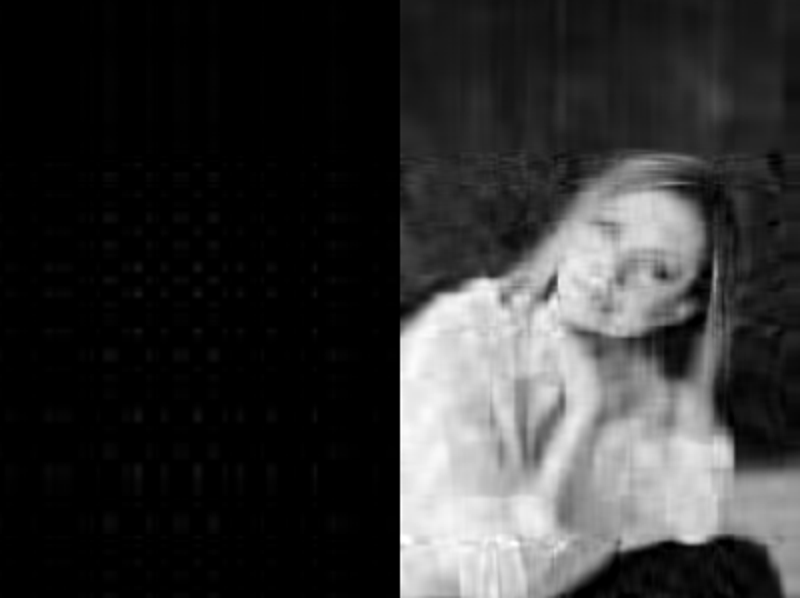

In [39]:
# Compute the outer product of the first column of U with the first row of VT scaled by the first singular value

comp_n = 15

rank1_component = S[comp_n] * np.outer(U[:, comp_n], VT[comp_n, :])

# Convert to uint8 and display
rank1_uint8 = np.clip(rank1_component, 0, 255).astype(np.uint8)
rank1_pil = Image.fromarray(rank1_uint8)
# display(rank1_pil.resize((400, int(rank1_pil.height * 400 / rank1_pil.width))))

# Reconstruct the image using only the first singular value
img_rank1 = U[:, 0:comp_n] @ np.diag(S[0:comp_n]) @ VT[0:comp_n, :]

# Convert to uint8 and display
img_rank1_uint8 = np.clip(img_rank1, 0, 255).astype(np.uint8)
img_rank1_pil = Image.fromarray(img_rank1_uint8)
# display(img_rank1_pil.resize((400, int(img_rank1_pil.height * 400 / img_rank1_pil.width))))

# Show both images side by side for comparison
combined_width = rank1_pil.width + img_rank1_pil.width
combined_height = max(rank1_pil.height, img_rank1_pil.height)
combined_image = Image.new('L', (combined_width, combined_height))
combined_image.paste(rank1_pil, (0, 0))
combined_image.paste(img_rank1_pil, (rank1_pil.width, 0))
# Display them side by side in one row
display(combined_image.resize((800, int(combined_image.height * 800 / combined_image.width))))

## A simpler example of SVD

Let's look at a probably more familiar example of a matrix with data on two correlated variables. The data is simulated
but loosely resembles real world data on adult human heights and weights.

In [40]:
XY.shape

(15, 2)

In [41]:
x

array([162.47240713, 197.04285838, 183.91963651, 175.91950905,
       149.36111843, 149.35967122, 143.48501673, 191.97056875,
       176.0669007 , 182.48435467, 141.23506966, 198.19459113,
       189.94655845, 152.74034664, 150.90949803])

In [42]:
U, S, VT = np.linalg.svd(XY - XY.mean(axis=0), full_matrices=False)

In [43]:
print("U:\n", U)
print("S:\n", S)
print("VT:\n", VT)

U:
 [[-0.09427737 -0.04921815]
 [ 0.35354319 -0.13152032]
 [ 0.17795029 -0.47519828]
 [ 0.08500917  0.26006933]
 [-0.26026776  0.23999852]
 [-0.26747387 -0.24148488]
 [-0.34039197 -0.01438031]
 [ 0.2882365  -0.09271441]
 [ 0.08184439 -0.08019742]
 [ 0.16076529 -0.37749645]
 [-0.37022655 -0.05518724]
 [ 0.37317223  0.18124202]
 [ 0.27209475  0.58716811]
 [-0.2176845   0.15218311]
 [-0.24229379  0.09673638]]
S:
 [79.38088591  4.7139939 ]
VT:
 [[ 0.96982922  0.24378533]
 [-0.24378533  0.96982922]]


In [44]:
# Plot the direction of the first VT vector as a line on top of the scatter plot in 3D

slope = VT[0, 1] / VT[0, 0]
intercept = XY.mean(axis=0)[1] - slope * XY.mean(axis=0)[0]
x_vals = np.array([min(x), max(x)])
y_vals = intercept + slope * x_vals

fig = go.Figure()

# Add data points in 3D (z=0)
fig.add_trace(go.Scatter3d(
    x=x, 
    y=y,
    z=np.zeros_like(x),
    mode='markers',
    name='Data',
    marker=dict(size=5, color='blue')
))

# Add SVD component line in 3D (z=0)
fig.add_trace(go.Scatter3d(
    x=x_vals, 
    y=y_vals,
    z=np.zeros_like(x_vals),
    mode='lines',
    name='First SVD component',
    line=dict(color='red', width=4)
))

fig.update_layout(
    title='Simulated height/weight data with first SVD component (3D view)',
    scene=dict(
        xaxis_title='Height (cm)',
        yaxis_title='Weight (kg)',
        zaxis_title='Z',
        camera=dict(
            eye=dict(x=0, y=0, z=2)  # Top-down view initially
        )
    ),
    width=700,
    height=600
)

fig.show()